# Tutorial 1: Hamiltonian dynamics

## Physics 7810, Spring 2020

## T1.1 - Discrete-time solution of Hamilton's equations: the simple harmonic oscillator

In the first lecture, I introduced several simple discrete-time integration algortithms for Hamilton's equations of motion, including the Euler, symplectic Euler, and velocity Verlet (or leapfrog) methods. In this tutorial, you will test these methods for solving the equations of motion for a system with a known exact solution, the 1D simple harmonic oscillator (SHO).

The instantaneous state of the 1D SHO at time $t$ corresponds to a point in the 2D *phase space* ($x(t)$,$p(t)$), where $x$ is the displacement and $p = m \dot{x}$ is the conjugate momentum. In terms of $x$ and $p$, the Hamiltonian of the 1D SHO is:

$$H(p,x) = \frac{p^2}{2m} + \frac{k x^2}{2},$$

where $m$ is the mass and $k$ is the spring constant. This leads to Hamilton's equations of motion,

$$\dot{x} = \frac{\partial H}{\partial p} = \frac{p}{m}$$

$$\dot{p} = - \frac{\partial H}{\partial x} = - k x.$$

These two first-order ODEs can be combined to obtain a single second-order ODE, $m \ddot{x} = - k x$,
which has the general solution

$$x(t) = A \sin(\omega t + \delta)$$

$$p(t) = A m \omega \cos(\omega t + \delta),$$

where $\omega = \sqrt{k/m}$ is the angular frequency of the oscillator. The period of oscillation is $T = 2 \pi / \omega = 2 \pi \sqrt{m/k}$.

It's instructive and convenient to formulate this problem (simple as it is) in dimensionless variables. It's natural to take $m$ to be the unit of mass, and $t_0 = \sqrt{m/k}$ to be the unit of time. To proceed further, we note that the energy of the system, $E = H(p,x)$, is a constant of the motion, which can be taken to be the unit of energy, so the unit of length is $x_0 = \sqrt{E/k}$ and the unit of momentum is $p_0 = \sqrt{E m}$.

We now define the dimensionless position $X = x / x_0 = x / \sqrt{E / k}$ and the dimensionless momentum $P = p / p_0 = p / \sqrt{E m}$. Making this variable substitution in the Hamiltonian then gives

$${\cal H}(P,X) = \frac{1}{2} P^2 + \frac{1}{2} X^2,$$

where we have defined the dimensionless Hamiltonian ${\cal H}(P,X) = H(P,X) / E = 1$. It can be verified that $P$ and $X$ are still canonically conjugate variables in this new formulation.

Hamilton's equations of motion now become

$$\dot{X} = \frac{\partial \cal{H}}{\partial P} = P$$

$$\dot{P} = - \frac{\partial \cal{H}}{\partial X} = - X,$$

where the dots now indicate differentiation with respect to the dimensionless time variable $\tau = t / t_0$. These equations have solution

$$X(\tau) = \sqrt{2} \sin(\tau + \delta)$$

$$P(\tau) = \sqrt{2} \cos(\tau + \delta).$$

Note that the constant of integration is determined from the constraint ${\cal H}(P,X) = 1$. As a function of $\tau$, the system traces out a circular path of unit diameter in the $(X,P)$ phase space, with angular frequency $1$ and period $2 \pi$. This is as simple as it gets: the only remaining free parameter in the model is the phase angle $\delta$, which determines the initial condition at $\tau = 0$.

The purpose of this rather tedious exercise is not only to facilitate the subsequent analysis, but to illustrate the importance of introducing an appropriate, minimal set of dimensionless parameters prior to theoretical study or numerical simulation of any physical system. There's no need to investigate how the behavior of the SHO varies with $m$ or $k$ or $E$, as all SHOs map into the unique dimensionless model described above. This is a theme we will return to repeatedly over the course of the semester.

Now consider discrete-time solutions of Hamilton's equations for the SHO:

$$\frac{d X}{d t} = P$$

$$\frac{d P}{d t} = -X$$

(note that I'm now using $t$ instead of $\tau$ to denote the dimensionless time variable). Writing discrete-time approximations for the derivatives,

$$\frac{d X}{d t} \approx \frac{\Delta X}{\Delta t} = \frac{X(t + \Delta t) - X(t)}{\Delta t} = P(t)$$

$$\frac{d P}{d t} \approx \frac{\Delta P}{\Delta t} = \frac{P(t + \Delta t) - P(t)}{\Delta t} = - X(t),$$

leads immediately to the Euler algorithm,

$$X(t + \Delta t) = X(t) + P(t) \Delta t$$

$$P(t + \Delta t) = P(t) - X(t) \Delta t.$$

Note that both the position and momentum are updated simultaneously in the Euler scheme.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the Euler integrator, and plot the phase-space trajectory of the system as a function of $t$ in the $(X,P)$ plane. Also plot the total energy $E = {\cal H}(P,X)$ as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. Do you recover the exact dynamics for sufficiently small $\Delta t$?

### Solution:
The followings are the primary methods used to solve the problems in this tutorial.

In [29]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc

rc('font', **{
    'family': 'sans-serif',
    'sans-serif': ['DejaVu Sans'],
    'size': 10
})
# Set the font used for MathJax - more on this later
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

class SHO_integrators:
    
    def __init__(self):
        # attributes related to the exact solution
        self.t = np.linspace(0, 4*np.pi, 100) 
        self.x_exact = np.sqrt(2) * np.sin(self.t)
        self.p_exact = np.sqrt(2) * np.cos(self.t)
        self.E_exact = 0.5 * np.power(self.x_exact, 2) + 0.5 * np.power(self.p_exact, 2)
        
    def integrators(self, integrator, n=500, dt=0.01*np.pi*4):
        self.integrator = integrator
        x_0, p_0 = 0, np.sqrt(2)
        x_approx, p_approx = [x_0], [p_0]

        for i in range(n):
            if self.integrator == 'Euler':
                x_approx.append(x_approx[-1] + p_approx[-1] * dt)
                # note that at this point x_approx[-1] is the value that was appended now
                p_approx.append(p_approx[-1] - x_approx[-2] * dt)
            elif self.integrator == 'symplectic Euler':
                x_approx.append(x_approx[-1] + p_approx[-1] * dt)  # same as Euler
                p_approx.append(p_approx[-1] - x_approx[-1] * dt)
            elif self.integrator == 'Verlet':
                p_half = p_approx[-1] - x_approx[-1] * (dt) / 2
                x_approx.append(x_approx[-1] + p_half * dt)
                p_approx.append(p_half - x_approx[-1] * (dt) / 2)
            else:
                print('Error: Invalid integrator! Available options are:')
                print('"Euler", "symplectic Euler", and "Verlet".')
                break

        return x_approx, p_approx

    def SHO_plots(self, x_approx, p_approx):
        E_approx = 0.5 * np.power(x_approx, 2) + 0.5 * np.power(p_approx, 2)
        
        # Plotting: phase-space trajectory
        plt.figure()
        _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        plt.suptitle('Phase-space trajectory of 1D simple harmonic oscillators')

        plt.subplot(1, 2, 1)
        plt.plot(self.x_exact, self.p_exact)
        plt.xlabel('Dimensionless position')
        plt.ylabel('Dimensionless momentum')
        plt.title('Exact solution')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(x_approx, p_approx, '*')
        plt.xlabel('Dimensionless position')
        plt.ylabel('Dimensionless momentum')
        plt.title('Approximation by %s scheme' % self.integrator)
        plt.grid()

        # Plotting: the total energy as a function of time
        plt.figure()
        _, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        plt.suptitle('The total energy as a function of time')

        plt.subplot(1, 2, 1)
        plt.plot(self.t, self.E_exact)
        plt.xlabel('Time')
        plt.ylabel('Dimensionless total energy')
        plt.title('Exact solution')
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(range(len(E_approx)), E_approx, '*')
        plt.xlabel('Time')
        plt.ylabel('Dimensionless total energy')
        plt.title('Approximation by %s scheme' % self.integrator)
        plt.grid()

#### Problem 1 of T1.1: the phase-space trajectory of 1D simple harmonic oscillators and the total energy as a function of time

<Figure size 432x288 with 0 Axes>

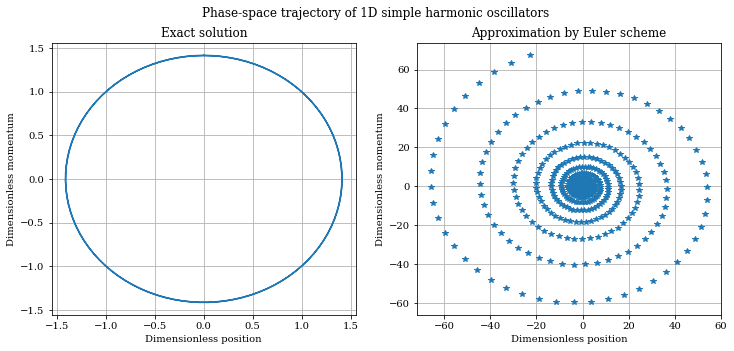

<Figure size 432x288 with 0 Axes>

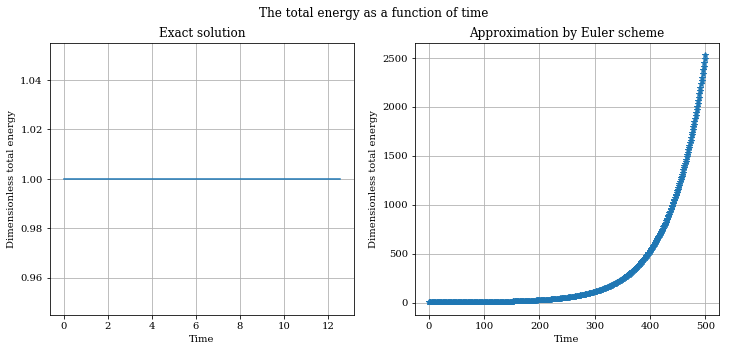

In [30]:
SI = SHO_integrators()
x_approx, p_approx = SI.integrators('Euler')
SI.SHO_plots(x_approx, p_approx)

As shown above, clearly Euler scheme is not stable enough. While the exact solution of the phase-space trajectory is a circle, the approximation by Euler scheme is a spiral, which was resulted from a circle with a ever-increasing radius. On the other hand, since the total energy $E = \frac{1}{2}X^{2} + \frac{1}{2}P^{2} = \frac{1}{2}(\sqrt{X^{2}+P^{2}})^{2}=\frac{1}{2}r^{2}$, the magnitude of the total energy is related to the radius of the phase-space trajectory $r$. As a result of increasing radius in the phase-space plot, the total energy approximated by Euler scheme diverges to infinity.

#### Problem 2 of T1.1: discussion about different $\Delta t$

<Figure size 432x288 with 0 Axes>

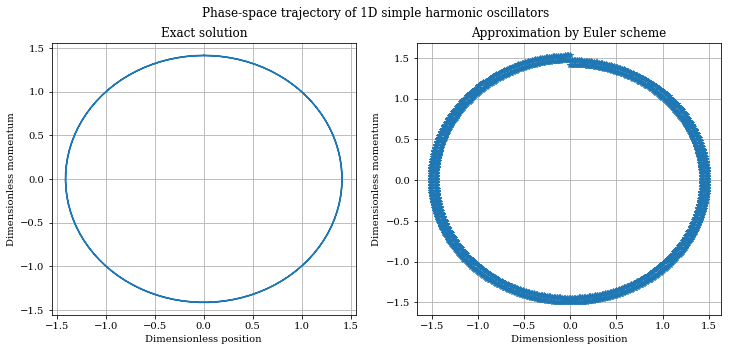

<Figure size 432x288 with 0 Axes>

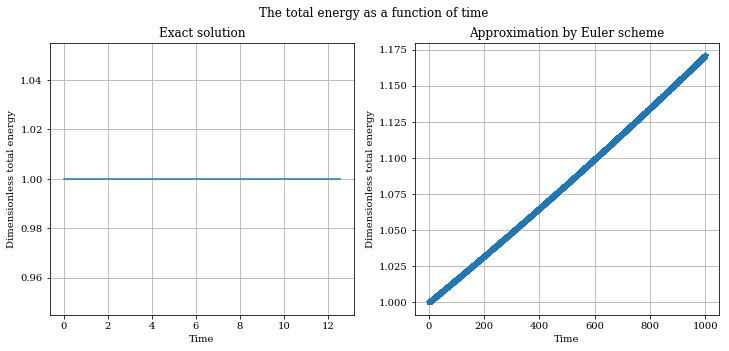

In [31]:
# Here we use a dt that is 10 times smaller than the original one
x_approx, p_approx = SI.integrators('Euler', n=1000, dt=0.001*np.pi*4)
SI.SHO_plots(x_approx, p_approx)

## T1.2 - The symplectic Euler algorithm

Now investigate the discrete-time integration of the equations of motion for the 1D SHO using the symplectic Euler algorithm,

$$X(t + \Delta t) = X(t) + P(t) \Delta t$$

$$P(t + \Delta t) = P(t) - X(t + \Delta t) \Delta t.$$

Note that, unlike the Euler algorithm, this method involves a specific sequence of operations: first, the position is updated using the momentum at time $t$, then the momentum is updated using the new position (and the corresponding force $-X$) at time $t + \Delta t$.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the symplectic Euler integrator, and plot the phase-space trajectory and total energy of the system as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. How does the dynamics differ from that of the exact solution? Does the discrete-time dynamics display a well-defined period, and if so, is it equal to $2 \pi$?

<Figure size 432x288 with 0 Axes>

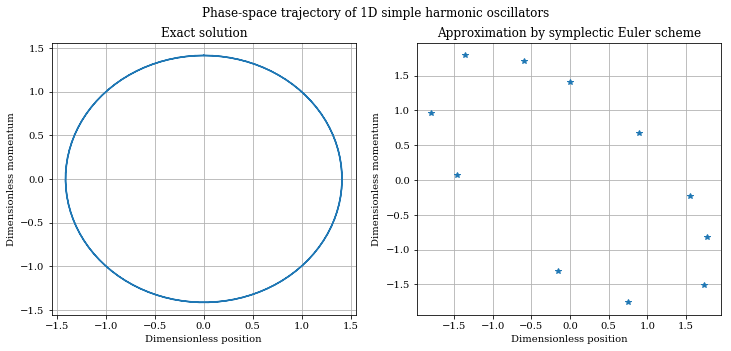

<Figure size 432x288 with 0 Axes>

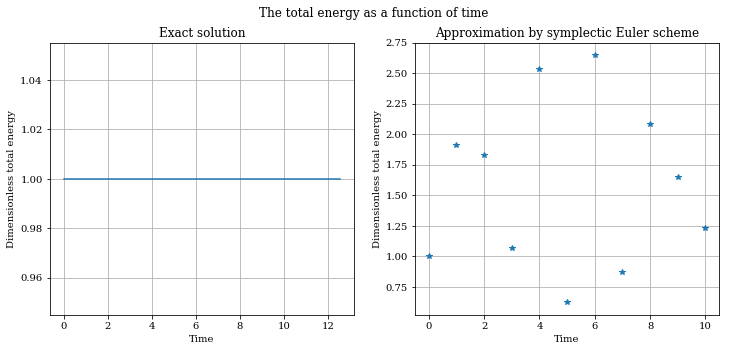

In [32]:
x_approx, p_approx = SI.integrators(integrator='symplectic Euler', n = 10, dt = 0.1 * 4 * np.pi)
SI.SHO_plots(x_approx, p_approx)

Rather than update the position and momentum at the same time as Euler scheme, symplectic Euler scheme updates the position first and use the updated position to update the momentum, which makes the quality of approximation better. As shown above, 

## T1.3 - The velocity Verlet algorithm

Finally, investigate the discrete-time integration of the equations of motion for the 1D SHO using the velocity Verlet (or leapfrog) algorithm,

$$P \left(t + \frac{\Delta t}{2} \right) = P(t) - X(t) \frac{\Delta t}{2}$$

$$X(t + \Delta t) = X(t) + P \left(t + \frac{\Delta t}{2} \right) \Delta t$$

$$P(t + \Delta t) = P \left(t + \frac{\Delta t}{2} \right) - X(t + \Delta t) \frac{\Delta t}{2}.$$

As for the symplectic Euler algorithm, a specific sequence of operations is implied here: first a half-timestep update of momentum using the initial force $- X(t)$, then a full-timestep update of the position using the midstep momentum $P(t + \Delta t/2)$, and finally a half-timestep update of the momentum using the final force $- X(t + \Delta t)$.

Write a Python program to integrate the equations of motion of the SHO over several periods of oscillation using the velocity Verlet integrator, and plot the phase-space trajectory and total energy of the system as a function of $t$. Compare these results with the exact solution, and explore the behavior as a function of the timestep $\Delta t$. Is the velocity Verlet method stable? Is the energy well-conserved over large time intervals? What happens if you make the timestep large compared with the period of the SHO?

The symmetric structure of the velocity Verlet algorithm implies that it is time-reversible. Verify this directly by integrating the SHO forward in time over some finite (large) time interval, then reversing the momentum and integrating forward in time over the same time interval. You should arrive back at the same phase space point, to a high degree of precision. In the same way, show that the symplectic Euler algorithm is *not* time reversible (even though it is rather stable).

<Figure size 432x288 with 0 Axes>

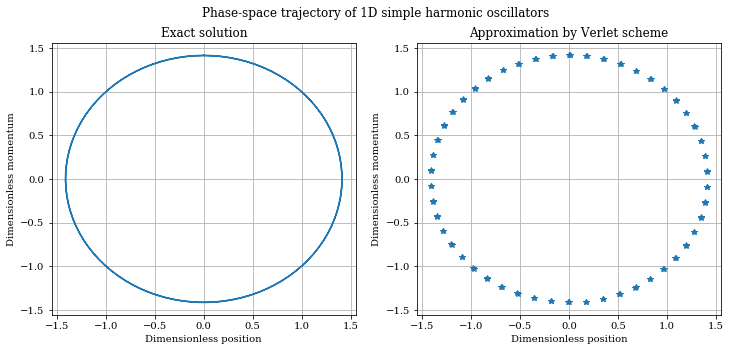

<Figure size 432x288 with 0 Axes>

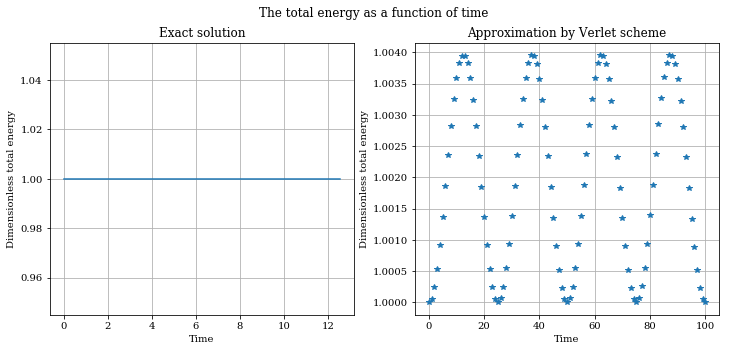

In [35]:
x_approx, p_approx = SI.integrators(integrator='Verlet', n = 100)
SI.SHO_plots(x_approx, p_approx)